In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load data
df=pd.read_csv("C:\\Users\\Admin\\Downloads\\diminos_data.csv")

#Basic inspection
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [9]:
df.isnull().sum()

order_id              0
order_placed_at       0
order_delivered_at    0
dtype: int64

In [11]:
df.describe()

,order_id
count,1.500000e+04
mean,1.530610e+06
std,4.330271e+03
min,1.523111e+06
25%,1.526861e+06
50%,1.530610e+06
75%,1.534360e+06
max,1.538110e+06


In [13]:
df.columns

Index(['order_id', 'order_placed_at', 'order_delivered_at'], dtype='object')

In [15]:
df['order_placed_at']=pd.to_datetime(df['order_placed_at'])
df['order_delivered_at']=pd.to_datetime(df['order_delivered_at'])

In [17]:
df['delivery_time_minutes']=(df['order_delivered_at']-df['order_placed_at']).dt.total_seconds()/60

In [19]:
df[['order_placed_at', 'order_delivered_at','delivery_time_minutes']].head()

,order_placed_at,order_delivered_at,delivery_time_minutes
0,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17.140719
1,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15.598754
2,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15.104856
3,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38.533657
4,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16.176984


In [21]:
df['delivery_time_minutes'].describe()

count    15000.000000
mean        20.499389
std         96.160362
min         15.000010
25%         15.274826
50%         15.797986
75%         17.279661
max       7299.831375
Name: delivery_time_minutes, dtype: float64

In [23]:
#removeinvalid values if any
df=df[df['delivery_time_minutes']>0]

In [25]:
#Remove extreme outliers
df=df[df['delivery_time_minutes']<120]

In [27]:
#key metric : 95th percentile delivery time
df['delivery_time_minutes'].dtype
np.percentile(df['delivery_time_minutes'], 95)

26.247372241666667

In [29]:
#percemtage of late deliveries (>31 mins)
late_orders = (df['delivery_time_minutes']>31).mean()* 100
late_orders

3.2683678253298507

In [31]:
#count of late orders
late_count=(df['delivery_time_minutes']>31).sum()
total_orders=len(df)

late_count , total_orders

(488, 14931)

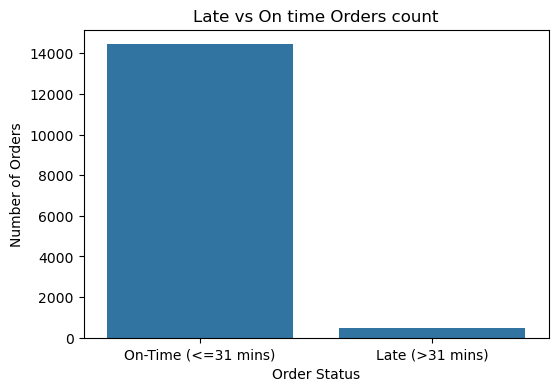

In [33]:
#late vs on time orders
df['Order_Status'] = np.where(df['delivery_time_minutes']>31,'Late (>31 mins)' , 'On-Time (<=31 mins)')
plt.figure(figsize=(6,4))
sns.countplot(x='Order_Status',data=df)
plt.xlabel("Order Status")
plt.ylabel("Number of Orders")
plt.title("Late vs On time Orders count")
plt.show()

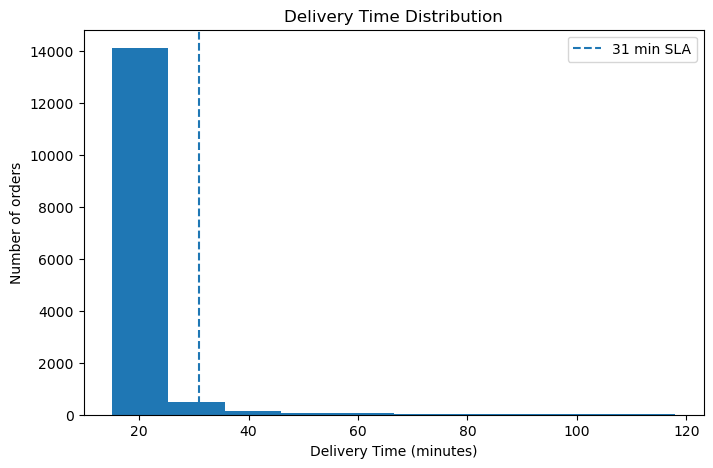

In [42]:
#Distribution of delivery times
plt.figure(figsize=(8,5))
plt.hist(df['delivery_time_minutes'], bins=10)
plt.axvline(31,linestyle='--',label='31 min SLA')
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Number of orders")
plt.title("Delivery Time Distribution")
plt.legend()
plt.show()

In [36]:
#calculate quartiles
Q1 = df['delivery_time_minutes'].quantile(0.25)
Q3 = df['delivery_time_minutes'].quantile(0.75)

#calculate IQR
IQR=Q3-Q1

#Define bounds
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

#Identify outliers
outliers=df[(df['delivery_time_minutes']<lower_bound) | (df['delivery_time_minutes']>upper_bound)]

#count outliers
num_outliers=outliers.shape[0]

num_outliers

1692

In [38]:
outlier_percentage=(num_outliers/len(df))*100
outlier_percentage

11.33212778782399

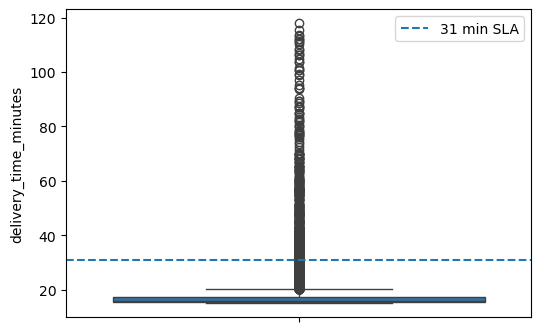

In [40]:
#box plot
plt.figure(figsize=(6,4))
sns.boxplot(y=df['delivery_time_minutes'])
plt.axhline(31,linestyle='--',label='31 min SLA')
plt.legend()
plt.show()

In [45]:
#peak vs non peak analysis
df['Order_Hour']=pd.to_datetime(df['order_placed_at']).dt.hour

peak=df[df['Order_Hour'].between(18,23)]
non_peak=df[~df['Order_Hour'].between(18,23)]

print(np.percentile(peak['delivery_time_minutes'],95),np.percentile(non_peak['delivery_time_minutes'],95))

25.658154246666662 26.384017924166663


## 